In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta


# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [38]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [40]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table
measurement_ref = Base.classes.measurement
station_ref = Base.classes.station

In [42]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
dates_list = session.query(measurement_ref.date).group_by(measurement_ref.date).all()
latest_date = max(dates_list)
latest_date

('2017-08-23',)

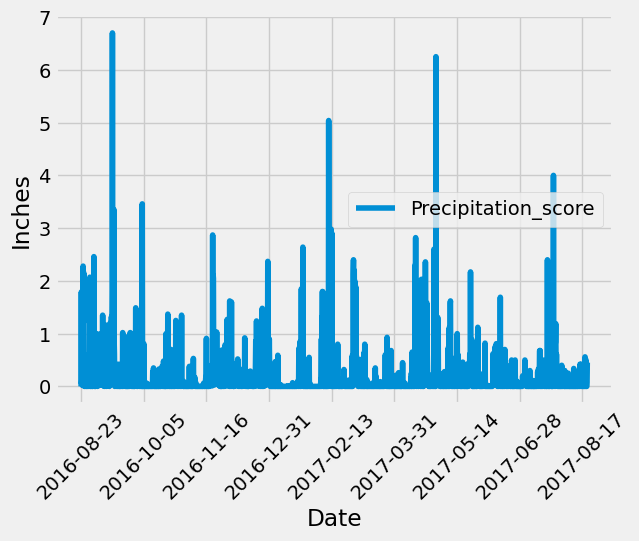

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
start_date = (dt.datetime.strptime(latest_date[0], '%Y-%m-%d') - dt.timedelta(days = 365)).date()

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(measurement_ref.date, measurement_ref.prcp).filter(measurement_ref.date >= start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_scores_df = pd.DataFrame(precipitation_scores, columns = ['Date', 'Precipitation_score'])

# Sort the dataframe by date
precipitation_scores_df_2 = precipitation_scores_df.sort_values('Date').reset_index(drop = True).dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_scores_df_2.plot('Date', 'Precipitation_score')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation = 45)

plt.show()

In [45]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_scores_df_2.describe()

,Precipitation_score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station_ref.station)).all()

[(9,)]

In [47]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_counts = session.query(measurement_ref.station, func.count(measurement_ref.station)).\
                            group_by(measurement_ref.station).\
                            order_by(func.count(measurement_ref.station).desc()).all()
stations_counts

station = stations_counts[0][0]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(measurement_ref.tobs), func.max(measurement_ref.tobs),\
                                    func.avg(measurement_ref.tobs)).filter(measurement_ref.station == station).all()
most_active_station

[(54.0, 85.0, 71.66378066378067)]

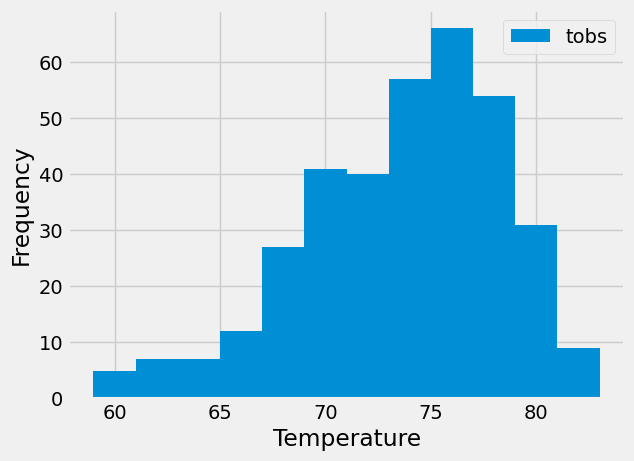

In [59]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df = pd.DataFrame(session.query(measurement_ref.tobs,measurement_ref.date,measurement_ref.station))
df = df[df['station'] == station]
df['date']= pd.to_datetime(df['date'])
df_delta = df[df['date'] >= df['date'].max() - relativedelta(days=364)]

df_delta.plot.hist(bins = 12)
plt.xlabel('Temperature')

plt.show()

# Close Session

In [60]:
# Close Session
session.close()